In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv('StudentsPerformance.csv')


In [93]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
269,female,group E,some college,free/reduced,none,71,76,70
270,male,group C,bachelor's degree,standard,none,69,63,61
271,male,group C,some college,standard,none,58,49,42
272,female,group D,associate's degree,free/reduced,none,47,53,58


In [94]:
df.info() # check the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       274 non-null    object
 1   race/ethnicity               274 non-null    object
 2   parental level of education  274 non-null    object
 3   lunch                        274 non-null    object
 4   test preparation course      274 non-null    object
 5   math score                   274 non-null    int64 
 6   reading score                274 non-null    int64 
 7   writing score                274 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 17.2+ KB


In [95]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [96]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [97]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
269,female,group E,some college,free/reduced,none,71,76,70
270,male,group C,bachelor's degree,standard,none,69,63,61
271,male,group C,some college,standard,none,58,49,42
272,female,group D,associate's degree,free/reduced,none,47,53,58
273,female,group D,some college,standard,none,65,70,71


In [98]:
#printing categorical value
categorical_cols=df.select_dtypes(include="object").columns
categorical_cols

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [99]:
for i in categorical_cols:
  print(df[i].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [100]:
df.shape #used to get the shape of a Pandas DataFrame.

(274, 8)

In [101]:
df.isnull().sum() #To check every column of the missing values or null values in the dataset

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<Axes: >

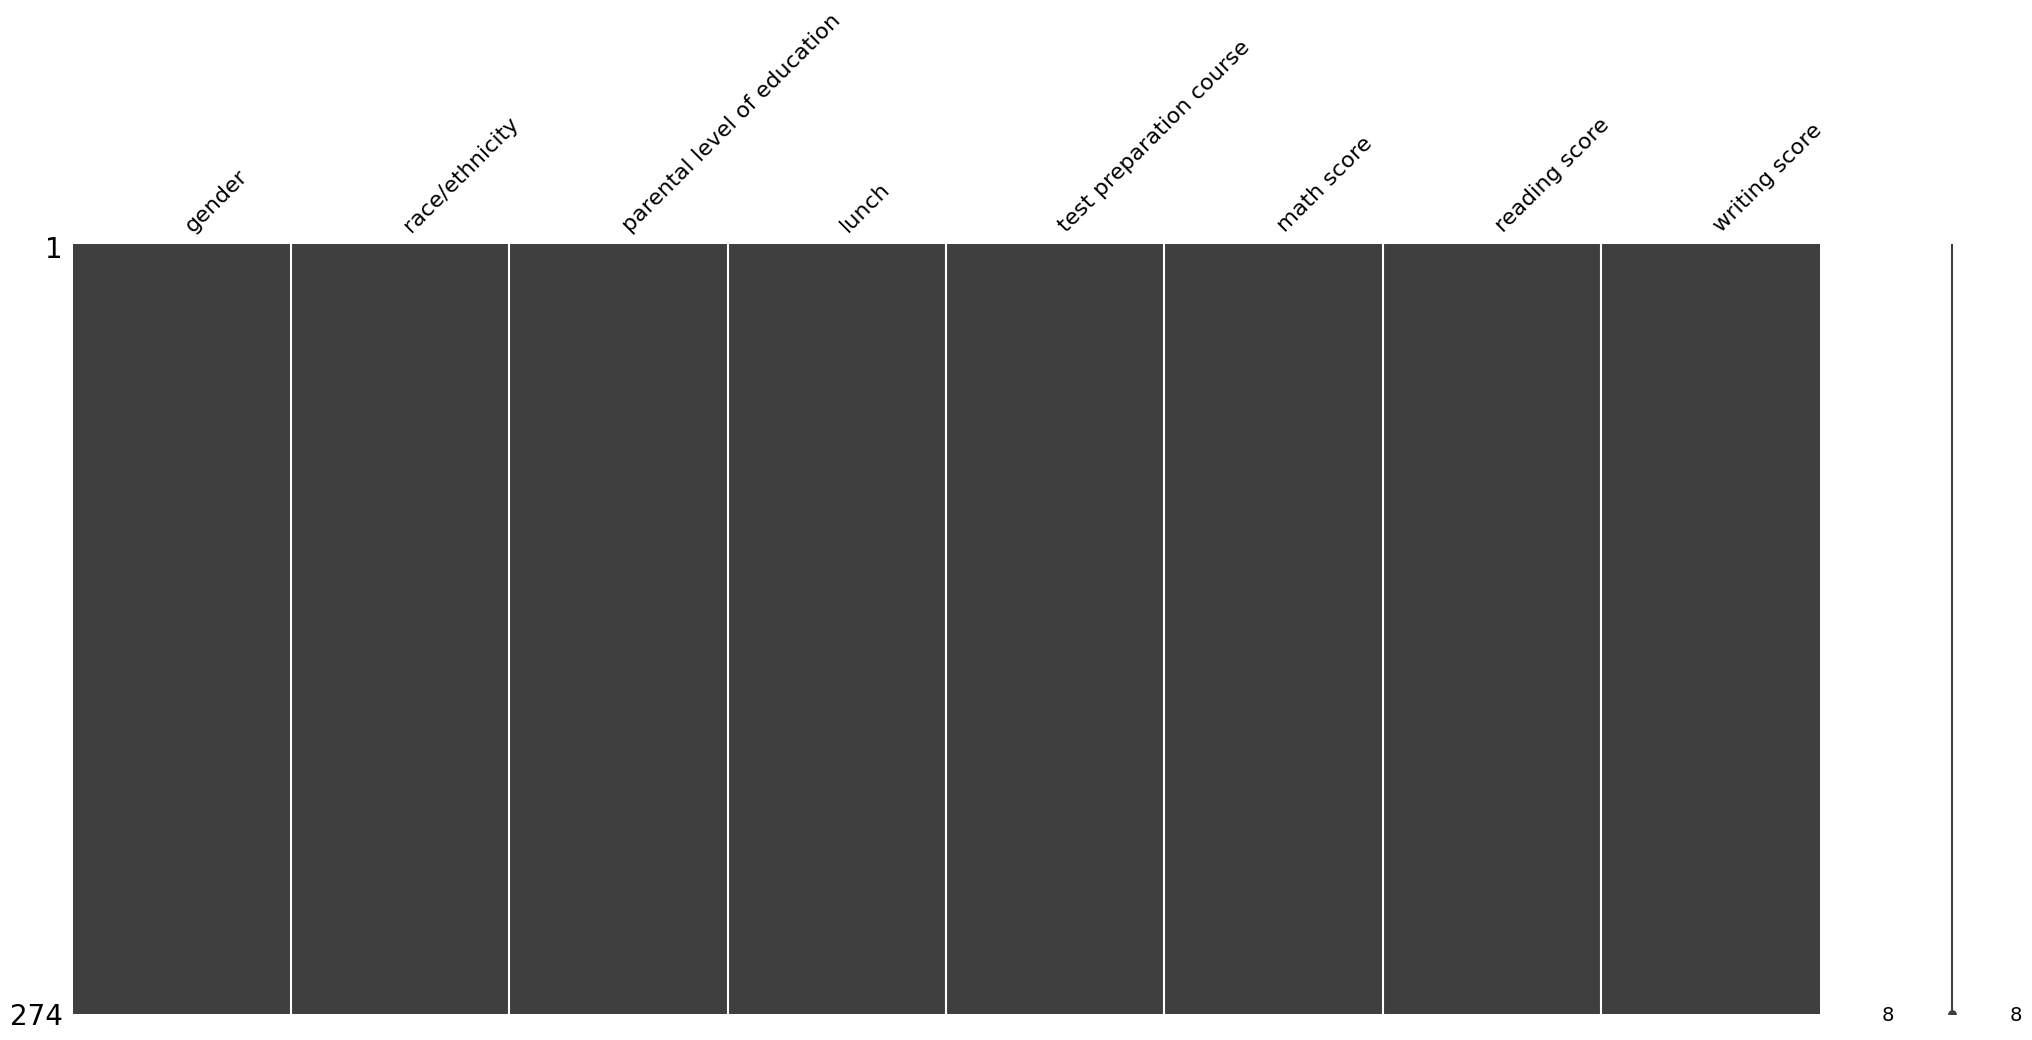

In [102]:
import missingno as msno  #Visualize missing values
msno.matrix(df)

In [103]:
#data cleaning
#checking missing values
df.isna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
269,False,False,False,False,False,False,False,False
270,False,False,False,False,False,False,False,False
271,False,False,False,False,False,False,False,False
272,False,False,False,False,False,False,False,False


In [104]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [105]:
df.duplicated().sum() # dataset has any duplicated values present or not

0

In [106]:
df.nunique() #Number of Unique Values in Each Column

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     69
reading score                  60
writing score                  68
dtype: int64

In [107]:
df.describe() #to generate descriptive statistics about a DataFrame

,math score,reading score,writing score
count,274.000000,274.000000,274.000000
mean,65.182482,68.087591,66.839416
std,15.434949,15.362041,15.626001
min,0.000000,17.000000,10.000000
25%,56.000000,56.000000,56.000000
50%,65.000000,69.000000,69.000000
75%,76.000000,79.750000,77.750000
max,100.000000,100.000000,100.000000


In [108]:
#Exploring Data
print("Categories in 'gender' variable:  ",end=" ")
print(df["gender"].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df["race/ethnicity"].unique())

print("Categories in 'parental level of education' variable:  ",end=" ")
print(df["parental level of education"].unique())

print("Categories in 'lunch' variable:  ",end=" ")
print(df["lunch"].unique())

print("Categories in 'test preparation course' variable:  ",end=" ")
print(df["test preparation course"].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test preparation course' variable:   ['none' 'completed']


In [109]:
#define numerical and categorical columns
numeric = [x for x in df.columns if df[x].dtype != "object"]
categorical = [x for x in df.columns if df[x].dtype == "object"]

print("We have {} Numerical Values: {}".format(len(numeric),numeric))
print("We have {} Categorical Values: {}".format(len(categorical),categorical))


We have 3 Numerical Values: ['math score', 'reading score', 'writing score']
We have 5 Categorical Values: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [110]:
#initializing the passmarks
passmark=35

#calculating percentage
df['Percentage'] = (df['math score']+df['reading score']+df['writing score'])/3

#defining the grade function
def Grade(Percentage):
    if (Percentage >= 95):return 'O'
    if (Percentage >= 81):return 'A'
    if (Percentage >= 71):return 'B'
    if (Percentage >= 61):return 'C'
    if (Percentage >= 51):return 'D'
    if (Percentage >= 41):return 'E'
    else: return 'F'

#Applyong the grade function to DataFrame rows
df["grade"] = df.apply(lambda x : Grade(x["Percentage"]), axis=1)

df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,B
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,B
6,female,group B,some college,standard,completed,88,95,92,91.666667,A
7,male,group B,some college,free/reduced,none,40,43,39,40.666667,F
8,male,group D,high school,free/reduced,completed,64,64,67,65.000000,C
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,E


In [111]:
df.tail(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
264,male,group D,high school,standard,none,76,73,68,72.333333,B
265,male,group D,some high school,free/reduced,none,59,42,41,47.333333,E
266,female,group C,bachelor's degree,standard,none,63,75,81,73.000000,B
267,female,group D,high school,standard,none,69,72,77,72.666667,B
268,female,group D,associate's degree,standard,completed,88,92,95,91.666667,A
269,female,group E,some college,free/reduced,none,71,76,70,72.333333,B
270,male,group C,bachelor's degree,standard,none,69,63,61,64.333333,C
271,male,group C,some college,standard,none,58,49,42,49.666667,E
272,female,group D,associate's degree,free/reduced,none,47,53,58,52.666667,D
273,female,group D,some college,standard,none,65,70,71,68.666667,C


In [112]:
df.describe()

,math score,reading score,writing score,Percentage
count,274.000000,274.000000,274.000000,274.000000
mean,65.182482,68.087591,66.839416,66.703163
std,15.434949,15.362041,15.626001,14.832873
min,0.000000,17.000000,10.000000,9.000000
25%,56.000000,56.000000,56.000000,56.166667
50%,65.000000,69.000000,69.000000,68.333333
75%,76.000000,79.750000,77.750000,77.916667
max,100.000000,100.000000,100.000000,99.666667


In [113]:
df['Percentage']

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
269    72.333333
270    64.333333
271    49.666667
272    52.666667
273    68.666667
Name: Percentage, Length: 274, dtype: float64

In [114]:
df["Average Score"]=(df["math score"]+df["reading score"]+df["writing score"])/3
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333,A,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333,B,76.333333
...,...,...,...,...,...,...,...,...,...,...,...
269,female,group E,some college,free/reduced,none,71,76,70,72.333333,B,72.333333
270,male,group C,bachelor's degree,standard,none,69,63,61,64.333333,C,64.333333
271,male,group C,some college,standard,none,58,49,42,49.666667,E,49.666667
272,female,group D,associate's degree,free/reduced,none,47,53,58,52.666667,D,52.666667


In [115]:
df.describe()

,math score,reading score,writing score,Percentage,Average Score
count,274.000000,274.000000,274.000000,274.000000,274.000000
mean,65.182482,68.087591,66.839416,66.703163,66.703163
std,15.434949,15.362041,15.626001,14.832873,14.832873
min,0.000000,17.000000,10.000000,9.000000,9.000000
25%,56.000000,56.000000,56.000000,56.166667,56.166667
50%,65.000000,69.000000,69.000000,68.333333,68.333333
75%,76.000000,79.750000,77.750000,77.916667,77.916667
max,100.000000,100.000000,100.000000,99.666667,99.666667


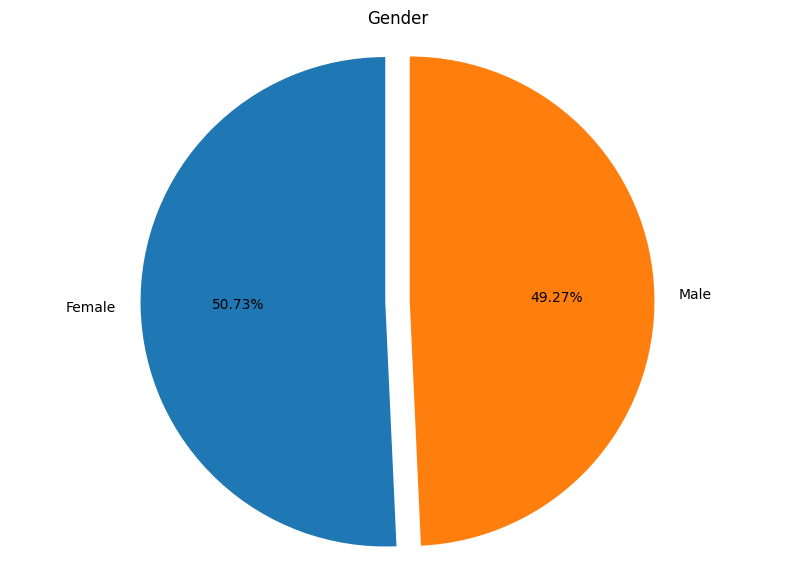

In [116]:
#PIE chart to demenstrate the total number of male and female
plt.figure(figsize=(10, 7))
labels=['Female', 'Male']
plt.pie(df['gender'].value_counts(),labels=labels,explode=[0,0.1],autopct='%1.2f%%', startangle=90)#strabgle determines the starting angle of pie chart
plt.title('Gender')
plt.axis('equal')
plt.show()

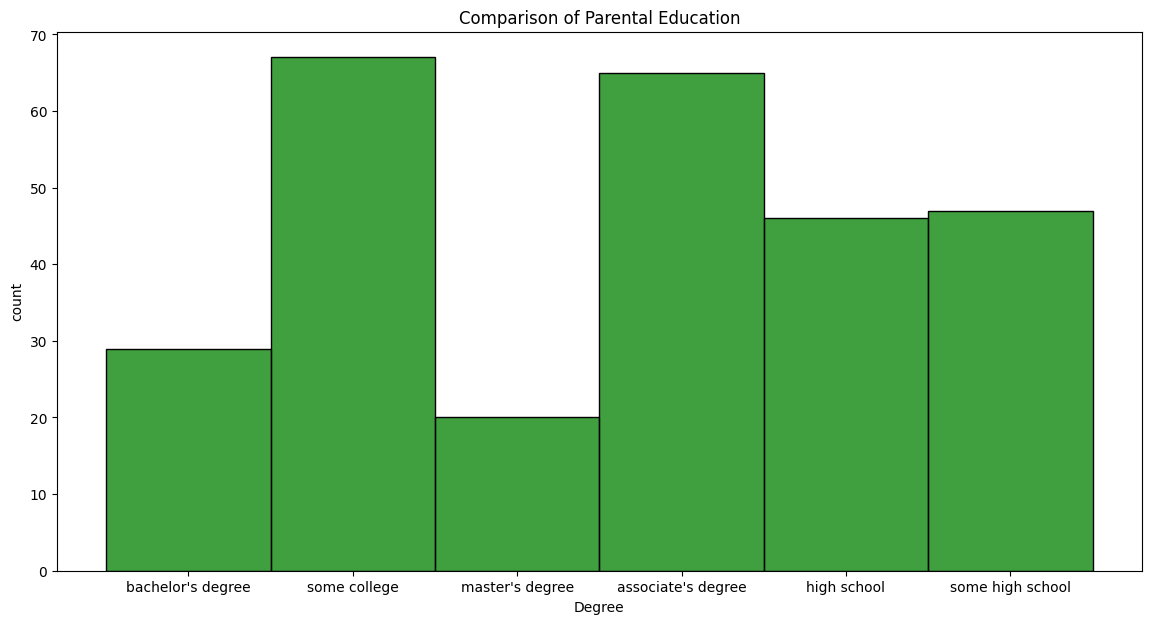

In [117]:
#Parental Level of Education Column
plt.rcParams['figure.figsize'] = (14, 7)
sns.histplot(df["parental level of education"],edgecolor='black',color='green')
plt.title('Comparison of Parental Education')
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

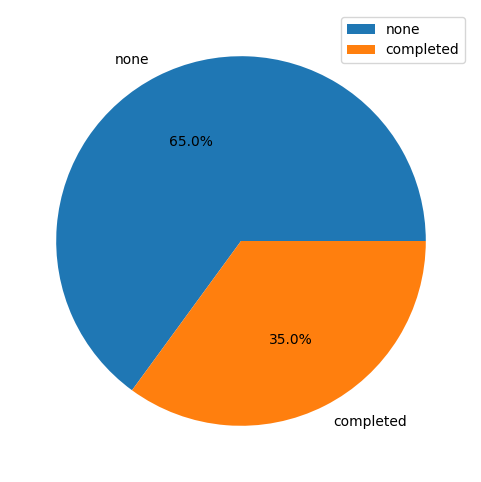

In [118]:
count_test = df['test preparation course'].value_counts()
labels = df['test preparation course'].value_counts().index
plt.figure(figsize= (6,6))
plt.pie(count_test,labels=labels,autopct='%1.1f%%')
plt.legend(labels)
plt.show()

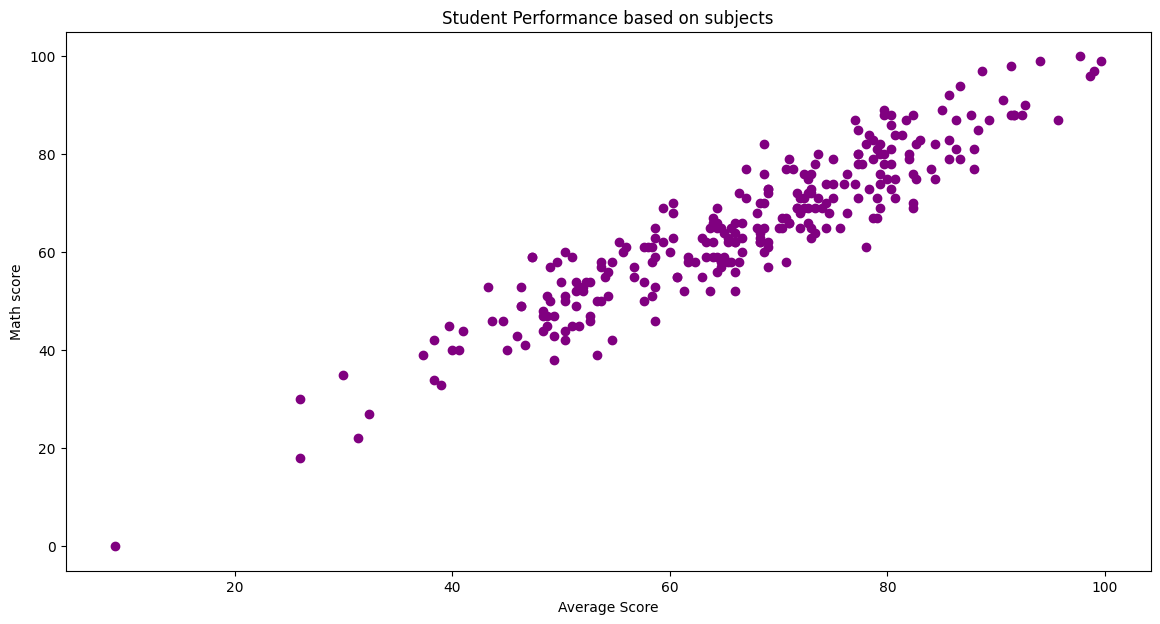

In [119]:
plt.scatter(df['Average Score'],df['math score'],c='purple')
plt.title('Student Performance based on subjects')
plt.xlabel('Average Score')
plt.ylabel('Math score')
plt.show()

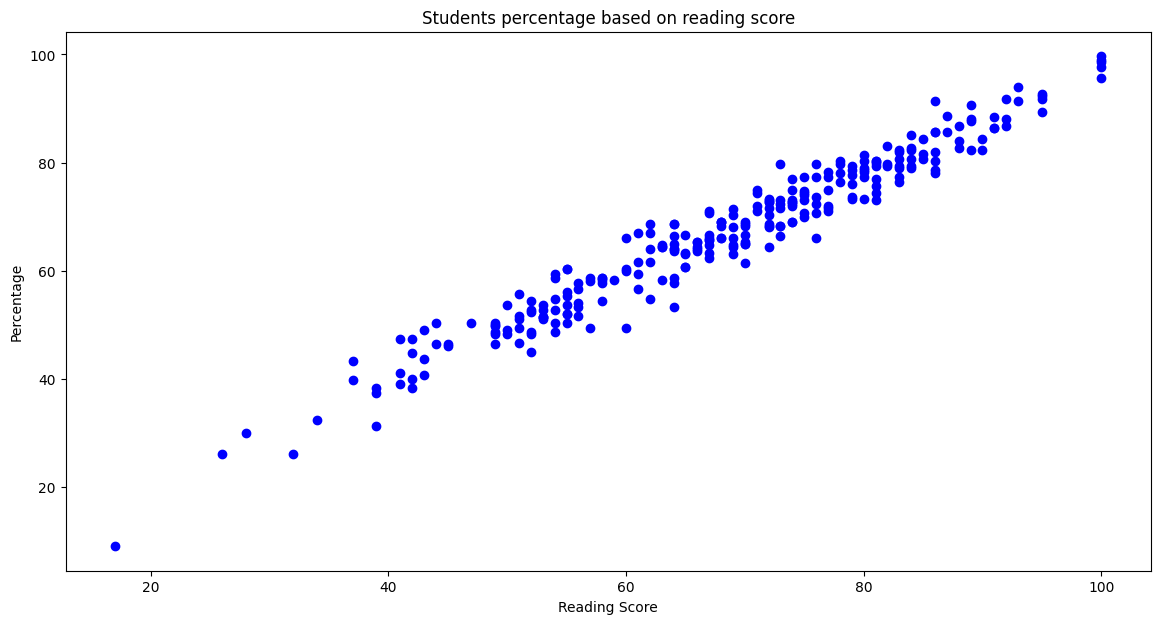

In [120]:
plt.scatter(df["reading score"],df['Percentage'],c='blue')
plt.title('Students percentage based on reading score')
plt.xlabel('Reading Score')
plt.ylabel('Percentage')
plt.show()

(array([ 1.,  3.,  9., 21., 44., 38., 67., 47., 30., 14.]),
 array([ 17. ,  25.3,  33.6,  41.9,  50.2,  58.5,  66.8,  75.1,  83.4,
         91.7, 100. ]),
 <BarContainer object of 10 artists>)

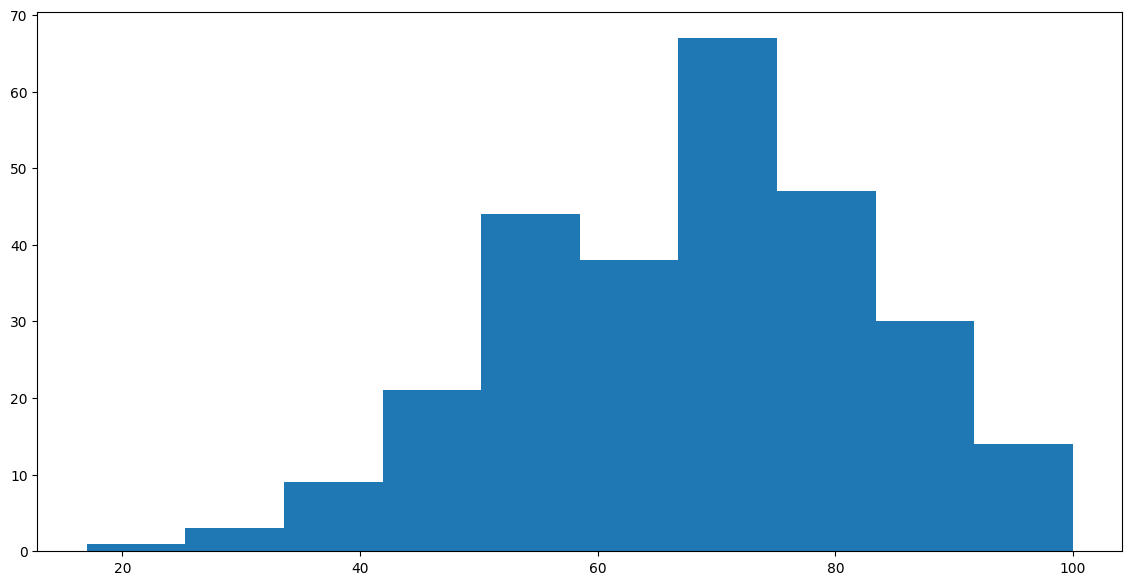

In [121]:
plt.hist(df["reading score"])

<Axes: xlabel='race/ethnicity', ylabel='Percentage'>

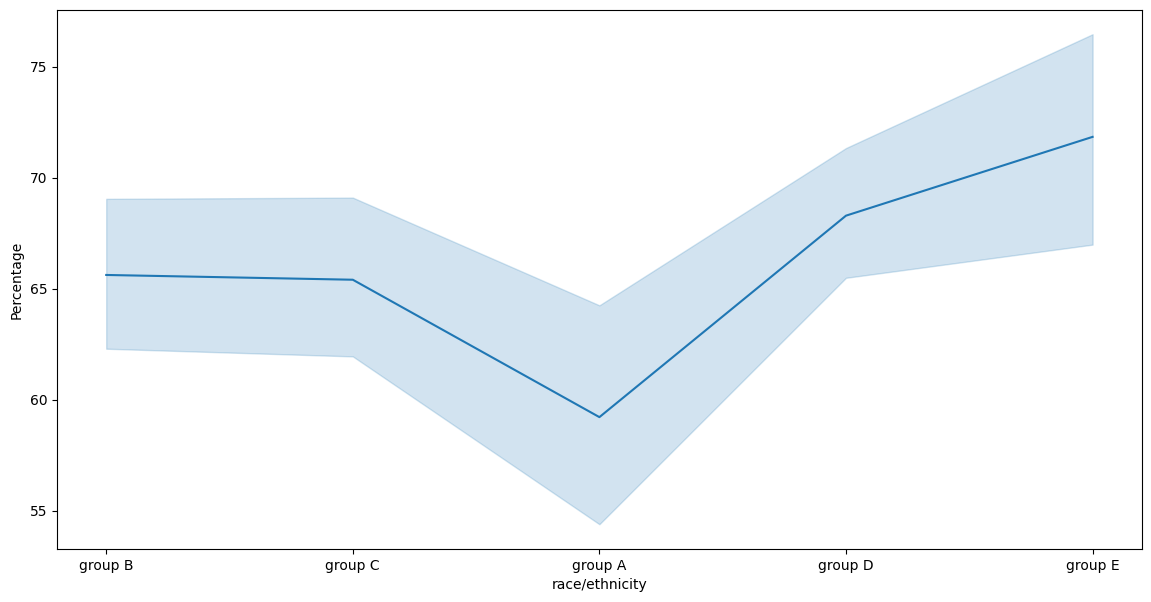

In [122]:
sns.lineplot(x="race/ethnicity",y="Percentage",data=df)

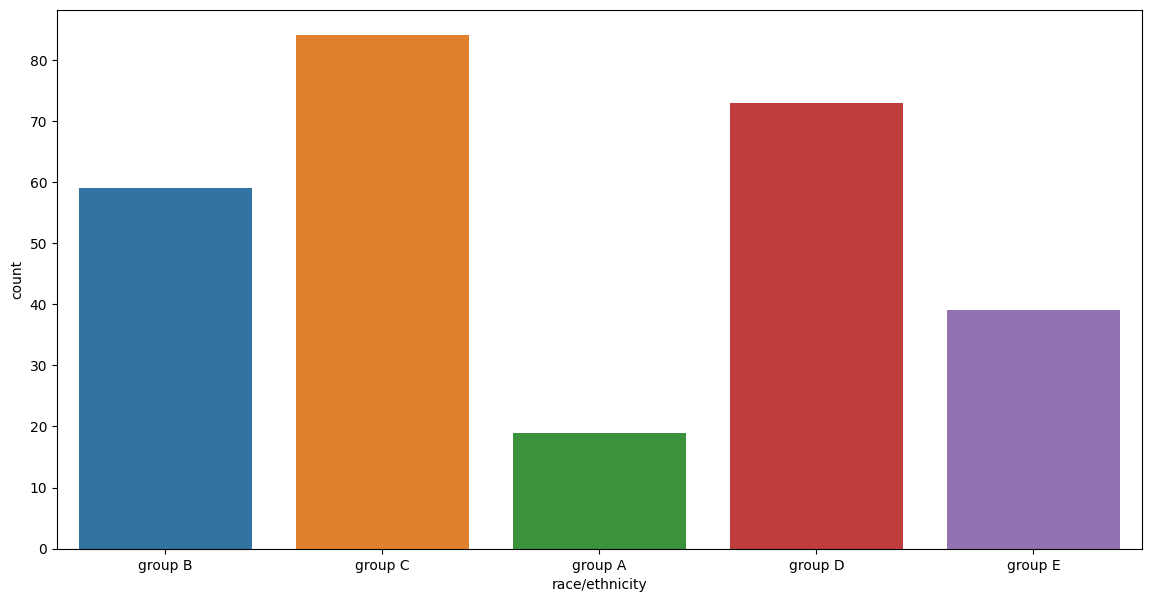

In [123]:
sns.countplot(x='race/ethnicity',data=df)
plt.show()

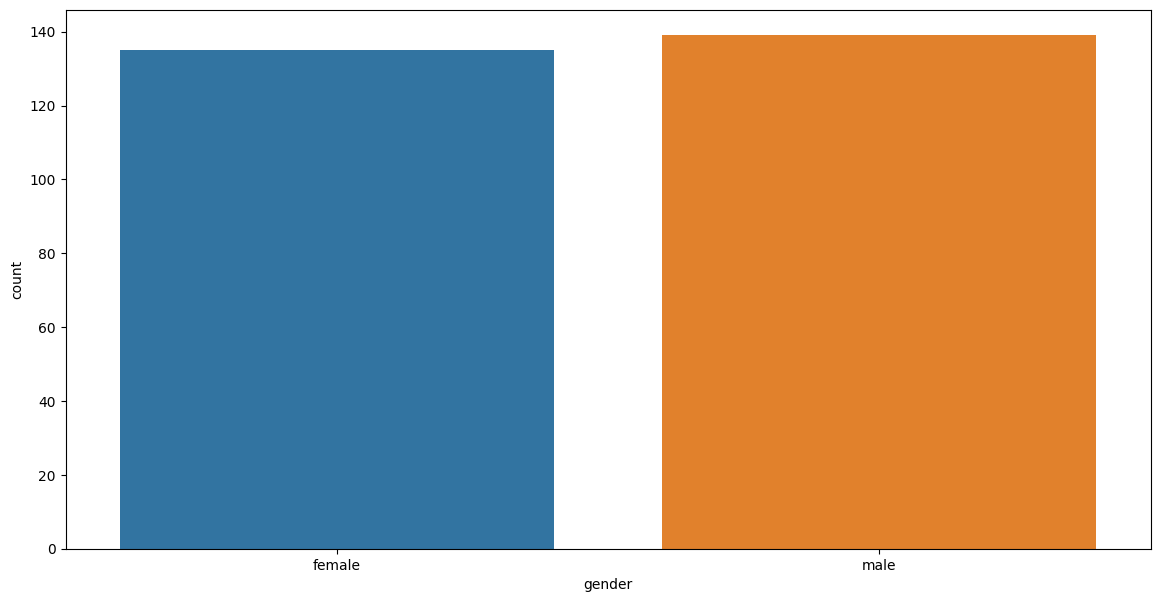

In [124]:
sns.countplot(x='gender',data=df)
plt.show()

<Axes: xlabel='Average Score', ylabel='math score'>

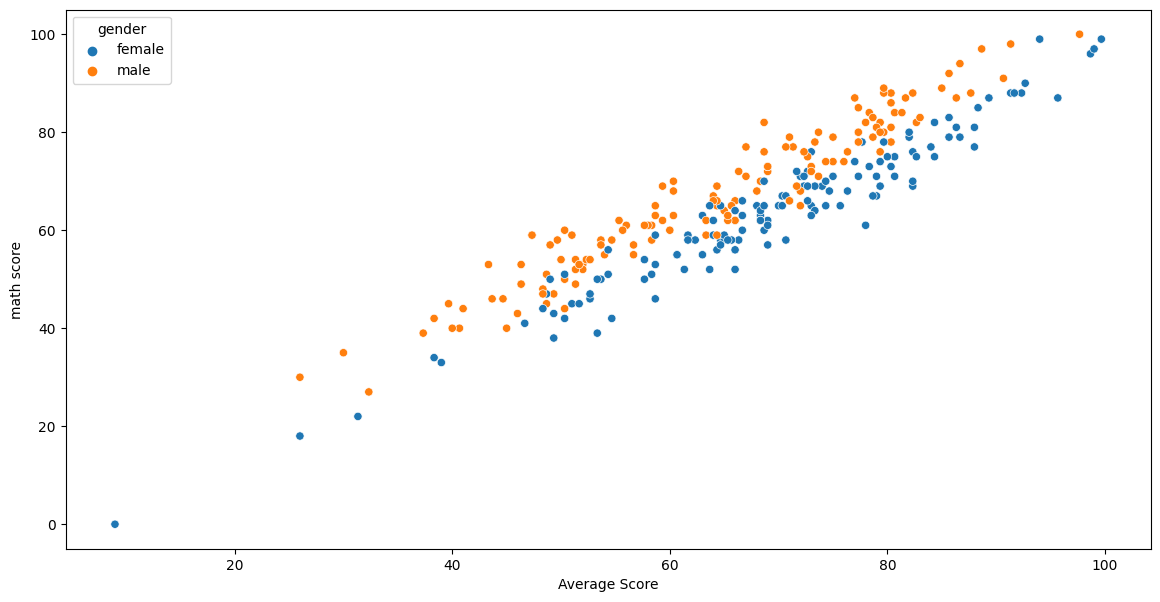

In [125]:
#Student performance in subjects based on gender
sns.scatterplot(x=df['Average Score'],y=df['math score'],hue=df['gender'])

<Axes: xlabel='Average Score', ylabel='reading score'>

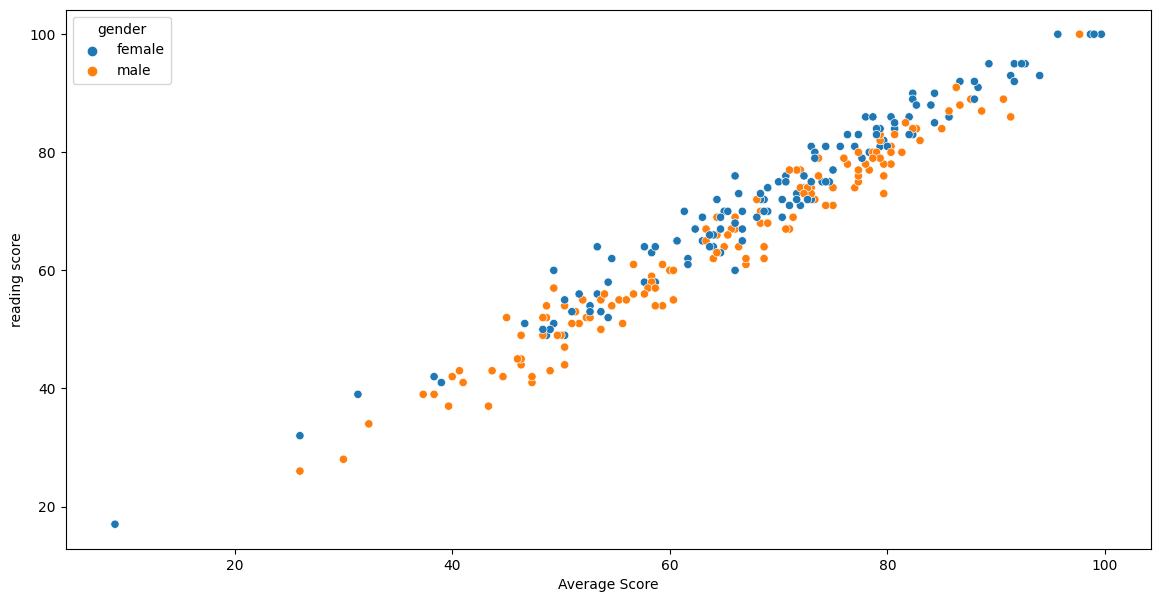

In [126]:
sns.scatterplot(x=df['Average Score'],y=df['reading score'],hue=df['gender'])

<Axes: xlabel='Average Score', ylabel='writing score'>

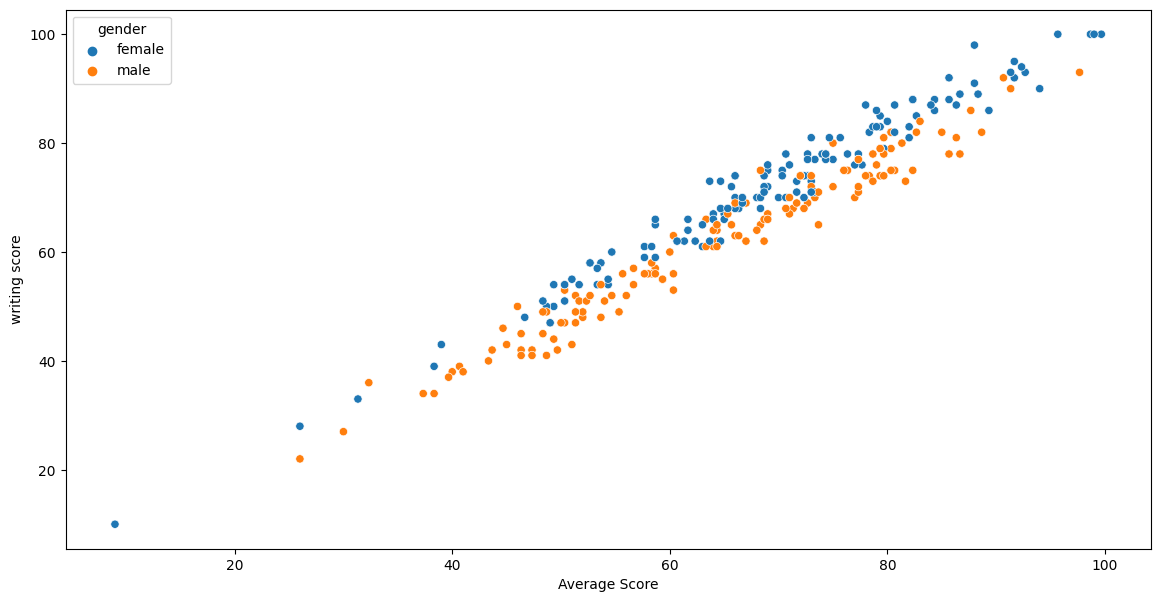

In [129]:
sns.scatterplot(x=df['Average Score'],y=df['writing score'],hue=df['gender'])

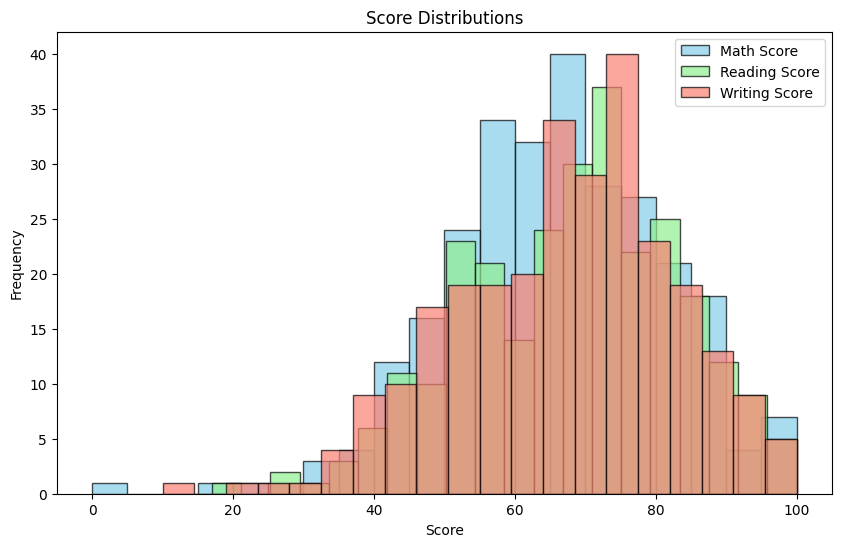

In [128]:
# Set up figure and axis
plt.figure(figsize=(10, 6))

# Plot histograms for Math Score, Reading Score, and Writing Score on the same set of axes
plt.hist(df['math score'], bins=20, alpha=0.7, label='Math Score', color='skyblue', edgecolor='black')
plt.hist(df['reading score'], bins=20, alpha=0.7, label='Reading Score', color='lightgreen', edgecolor='black')
plt.hist(df['writing score'], bins=20, alpha=0.7, label='Writing Score', color='salmon', edgecolor='black')

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Score Distributions')
plt.legend()  # Show legend indicating which color corresponds to which score

# Show the combined histogram
plt.show()
